In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
import numpy as np
import seaborn as sns
import pandas as pd
df=pd.read_csv("Dataset/WorldEnergy.csv")

In [40]:
df

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1973-01-31,4.932632,0.068103,0.403981,5.404715,1.173080,0.125781,1.047299,0.771858,6.747651,0.068103,0.403981,7.223873
1,1973-02-28,4.729582,0.064634,0.360900,5.155115,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.360900,6.592366
2,1973-03-31,4.946902,0.072494,0.400161,5.419556,1.309473,0.139950,1.169523,-0.067640,6.044647,0.072494,0.400161,6.521439
3,1973-04-30,4.716271,0.064070,0.380470,5.160812,1.085169,0.194185,0.890984,-0.110067,5.493184,0.064070,0.380470,5.941729
4,1973-05-31,4.956995,0.062111,0.392141,5.411246,1.162804,0.196775,0.966029,-0.305335,5.613551,0.062111,0.392141,6.071940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2022-07-31,6.921426,0.718109,1.132400,8.771935,1.907862,2.294320,-0.386458,0.199327,6.736891,0.718109,1.111161,8.584805
595,2022-08-31,7.047525,0.718526,1.044026,8.810077,1.821828,2.327090,-0.505262,0.225628,6.755154,0.718526,1.036589,8.530444
596,2022-09-30,6.915201,0.664673,0.978647,8.558521,1.702048,2.219831,-0.517784,-0.257997,6.144280,0.664673,0.960694,7.782741
597,2022-10-31,7.126618,0.614741,1.019209,8.760568,1.767733,2.322475,-0.554743,-0.394651,6.179721,0.614741,1.006859,7.811175


Exploratory Data Analysis


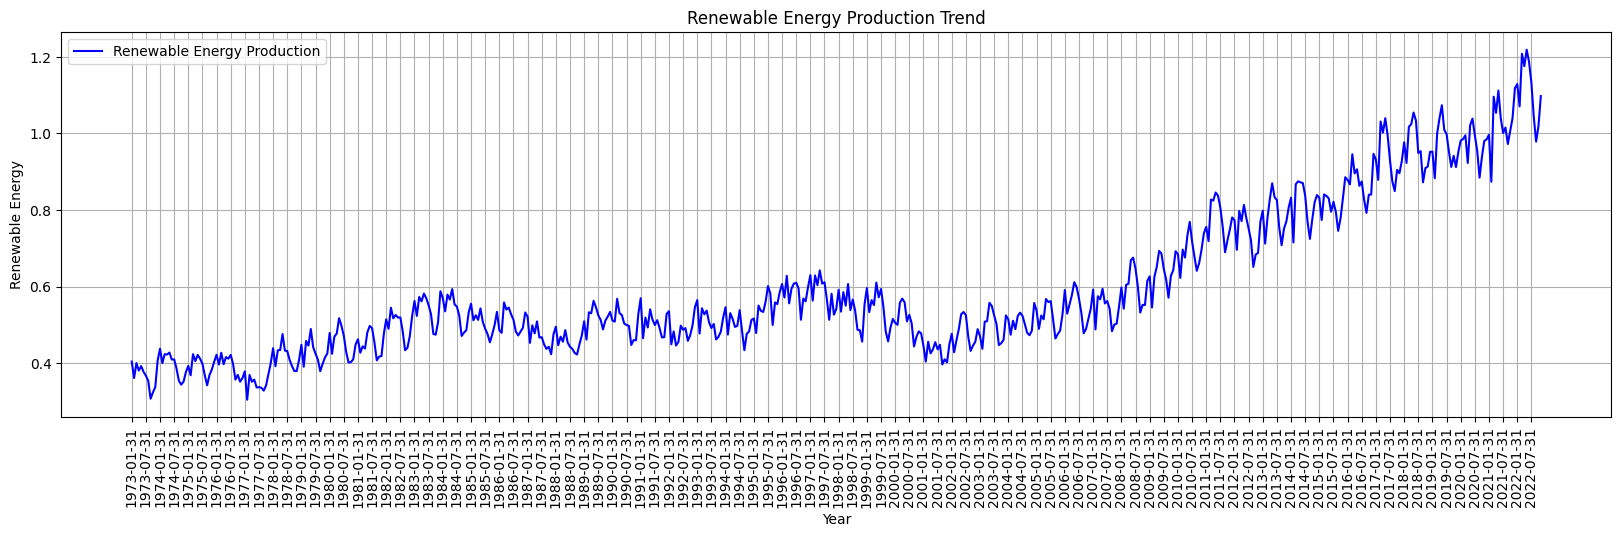

In [41]:
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Total Renewable Energy Production'], linestyle='-', color='b', label='Renewable Energy Production')
plt.xlabel('Year')
plt.ylabel('Renewable Energy')
plt.title('Renewable Energy Production Trend')
plt.xticks(df['Date'][::6], rotation=90)  # Ensure proper spacing and rotation
plt.legend()
plt.grid()
plt.show()


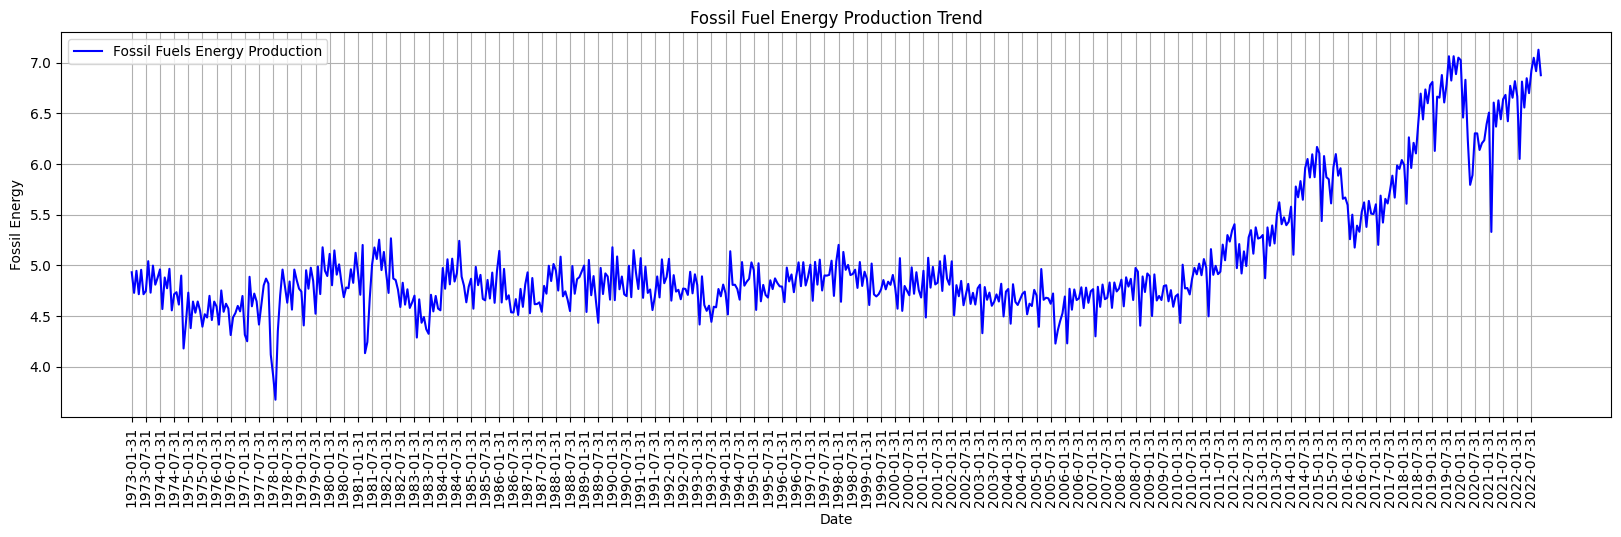

In [42]:
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Total Fossil Fuels Production'], linestyle='-', color='b', label='Fossil Fuels Energy Production')
plt.xlabel('Date')
plt.ylabel('Fossil Energy')
plt.title('Fossil Fuel Energy Production Trend')
plt.xticks(df['Date'][::6], rotation=90)  # Ensure proper spacing and rotation
plt.legend()
plt.grid()
plt.show()

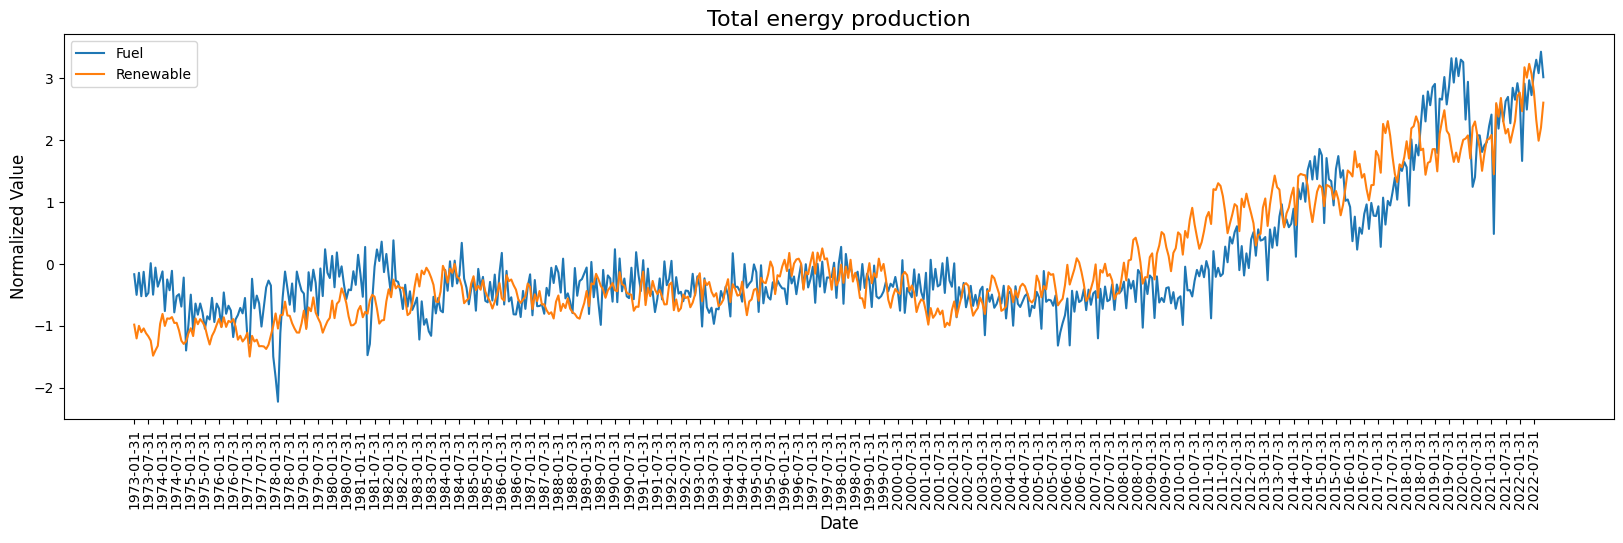

In [43]:
scaler=StandardScaler()
df['Normalized Fuel'] = scaler.fit_transform(df[['Total Fossil Fuels Production']])
df['Normalized Renewable'] = scaler.fit_transform(df[['Total Renewable Energy Production']])

plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Normalized Fuel'], label="Fuel")
plt.plot(df['Date'], df['Normalized Renewable'], label="Renewable")
plt.title("Total energy production", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)
plt.xticks(rotation=90)
plt.xticks(df['Date'][::6])  
plt.legend()
plt.show()

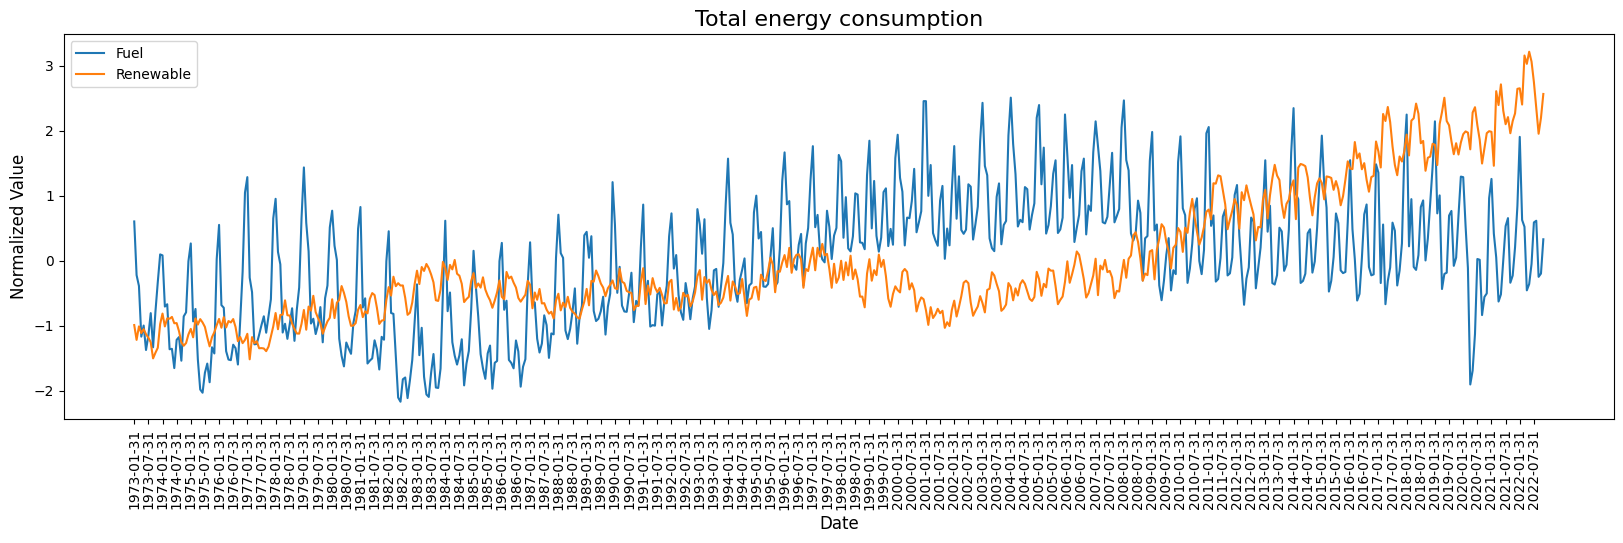

In [44]:
scaler=StandardScaler()
df['Normalized Fuel'] = scaler.fit_transform(df[['Total Fossil Fuels Consumption']])
df['Normalized Renewable'] = scaler.fit_transform(df[['Total Renewable Energy Consumption']])

plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Normalized Fuel'], label="Fuel")
plt.plot(df['Date'], df['Normalized Renewable'], label="Renewable")
plt.title("Total energy consumption", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)
plt.xticks(rotation=90)
plt.xticks(df['Date'][::6])  
plt.legend()
plt.show()

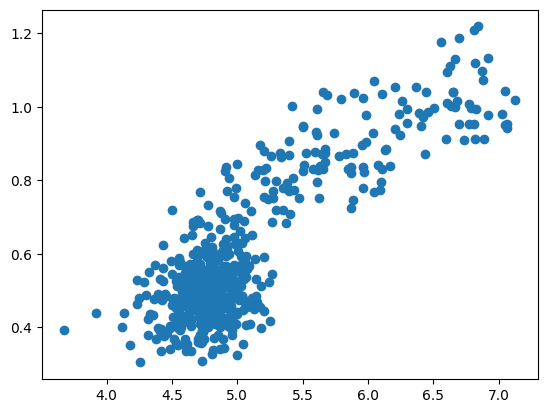

In [45]:
plt.scatter(df['Total Fossil Fuels Production'], df['Total Renewable Energy Production'])


In [46]:
correlation = df['Total Fossil Fuels Production'].corr(df['Total Renewable Energy Production'], method='pearson')

print(f"Pearson: {correlation:.3f}")


Pearson: 0.851


In [47]:
df["% Renewable"]= df['Total Renewable Energy Production']/df['Total Primary Energy Production']*100

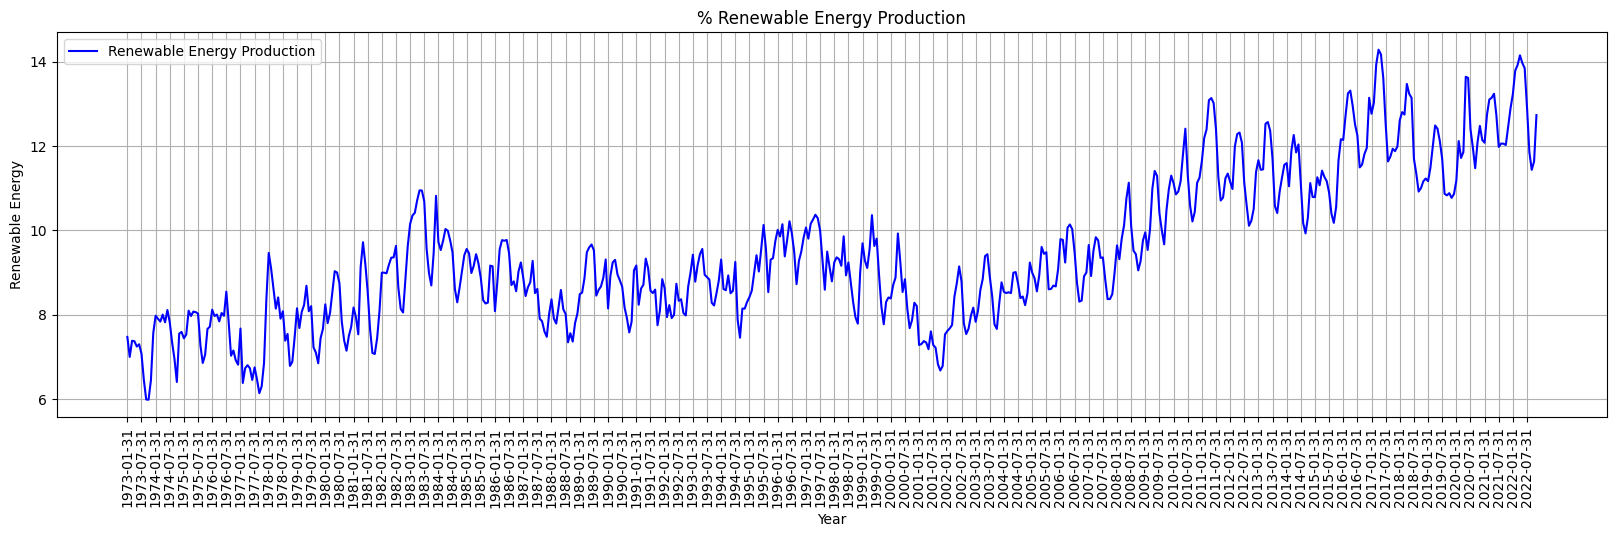

In [48]:
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['% Renewable'], linestyle='-', color='b', label='Renewable Energy Production')
plt.xlabel('Year')
plt.ylabel('Renewable Energy')
plt.title('% Renewable Energy Production')
plt.xticks(df['Date'][::6], rotation=90)  # Ensure proper spacing and rotation
plt.legend()
plt.grid()
plt.show()

Machine Learning and Statistics

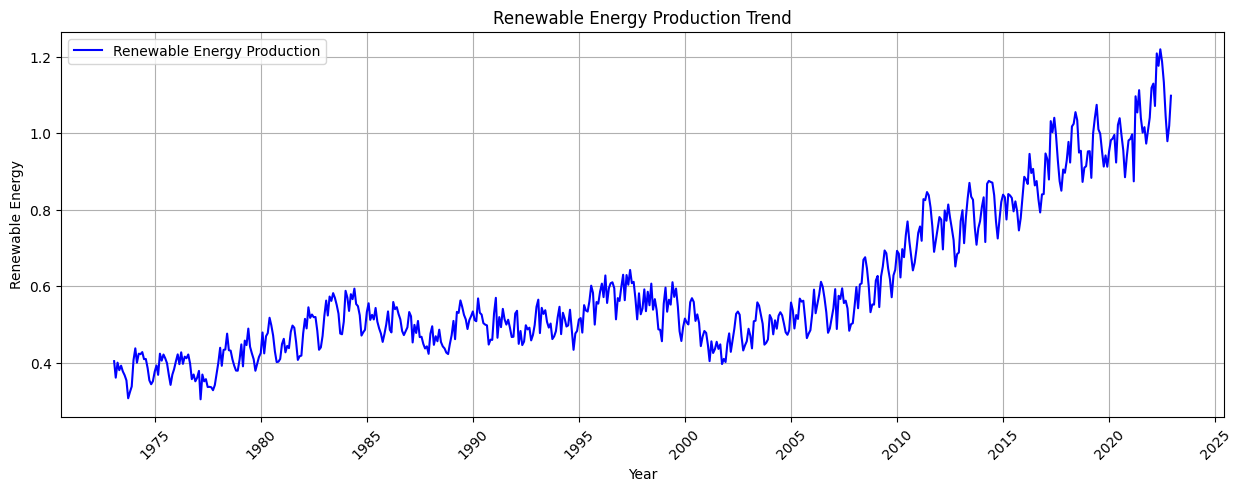

21:42:45 - cmdstanpy - INFO - Chain [1] start processing
21:42:45 - cmdstanpy - INFO - Chain [1] done processing


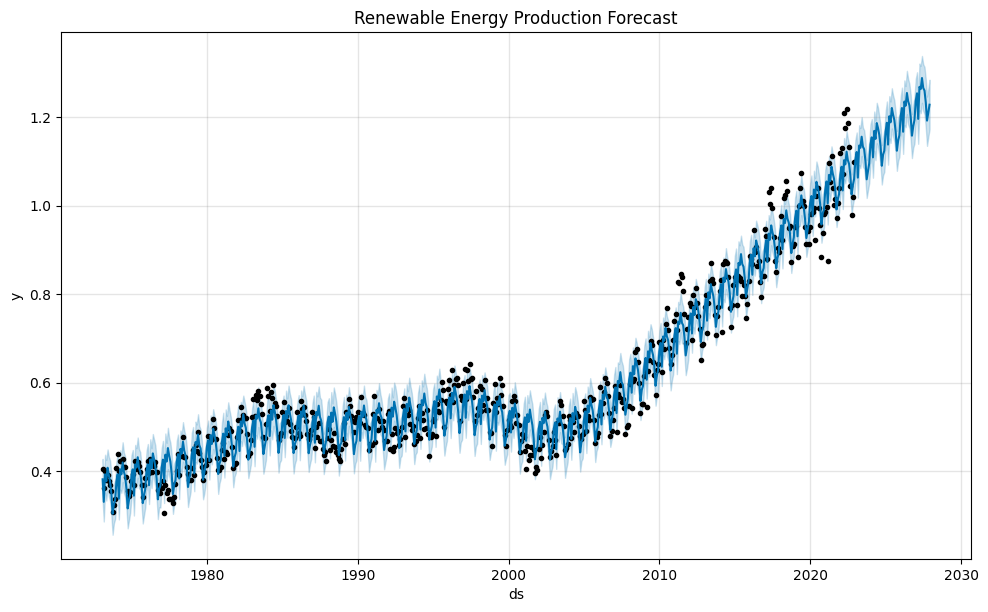

In [49]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df = df[['Date', 'Total Renewable Energy Production']].rename(columns={'Date': 'ds', 'Total Renewable Energy Production': 'y'})  # Format for Prophet

# --- 2. VISUALIZATION OF THE TREND ---
plt.figure(figsize=(15, 5))
plt.plot(df['ds'], df['y'], linestyle='-', color='b', label='Renewable Energy Production')

# Formatting the X-axis (one label every 5 years)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Year')
plt.ylabel('Renewable Energy')
plt.title('Renewable Energy Production Trend')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# --- 3. MODELING AND FORECASTING WITH PROPHET ---
model = Prophet()
model.fit(df)

# Creating future dates (5 years ahead)
future = model.make_future_dataframe(periods=60, freq='ME')  # 60 months
forecast = model.predict(future)

# --- 4. VISUALIZATION OF THE FORECAST ---
model.plot(forecast)
plt.title("Renewable Energy Production Forecast")
plt.show()

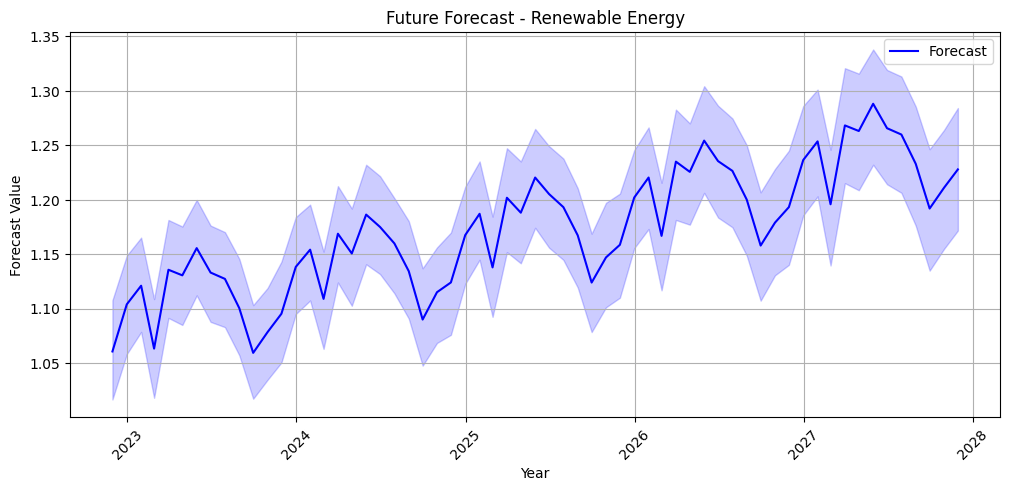

In [50]:
# Filter only future dates
future_forecast = forecast[forecast['ds'] >= df['ds'].max()]

# Create the forecast plot
plt.figure(figsize=(12, 5))
plt.plot(future_forecast['ds'], future_forecast['yhat'], color='b', label='Forecast')
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], color='blue', alpha=0.2)

# Format the plot
plt.xlabel('Year')
plt.ylabel('Forecast Value')
plt.title('Future Forecast - Renewable Energy')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()